In [1]:
#Notebooks for small tests
import os  
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
#imports and plotting function
import argparse
import mat73
import logging
import numpy as np
#import torchvision
from datetime import datetime
import os
import scipy.io
from torch.utils.data import DataLoader
import io
from PIL import Image
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import wandb
import math
import torch.nn.functional as F
import torchvision.transforms as T
import torch.nn as nn
import torch
import sys
import torch.optim.lr_scheduler as lr_scheduler
import wandb
import torch
from sklearn.preprocessing import StandardScaler
import Models as M
import Helpers as H
import time
import copy
from torch.func import vmap
from functorch.experimental import replace_all_batch_norm_modules_
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

encoder_out='sigmoid'
cwd=os. getcwd()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

data_path=os.path.join(cwd,'Data/PNAS-regime_all_seeds/PNAS-regime_seed0')
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(medium.shape)
inners=medium.transpose().conjugate()@medium
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of data: ', coherence)
#b=np.load(data_path+'/train/b.npy')
#rho=np.load(data_path+'/train/rho.npy')
#print(np.allclose(medium@rho[0],b[0]))
index_list=[]

torch.__version__ 
from sklearn.cluster import KMeans
import numpy as np
columns=np.load(f'/home/achristie/Codes_data/Experiment_data/50_trained_decoders_10kdata.npy')
index_list_list=[]
for medium_hat in columns:
    sum_max_inner_original=0      
    torch_inners=np.abs(np.inner(medium_hat,medium.T.conj()) ) #entry i j is ghat_i dot bar(g_j) 
            #original way of computing inners
            # mean over true max over hats
    index_list=[]
    for i in range(400):
        if max(torch_inners[:, i])>.99 and i not in index_list:
            index_list.append(i)
        sum_max_inner_original=sum_max_inner_original+max(torch_inners[:, i])
    max_avg_inners_original=sum_max_inner_original/400
    index_list_list.append(index_list)
print(columns.shape)
X = np.row_stack(columns)
X=np.concatenate((X.real, X.imag), axis=1)  
print(X.shape, X.dtype)

for i in X:
    if X.dtype!=np.float32:
        print(i)
        print('nan found')
        break

kmeans=KMeans(n_clusters=400, random_state=0).fit(X)

(1450, 400)
(400, 400)
coherence of data:  0.7119395644427655
(50, 400, 1450)
(20000, 2900) float32


0.819986
(23,)
maximum average inner product between centers and truemax_avg_inners_original 0.8627710996852648
(1450, 1450)
coherence of centers:  0.4545079
Average Cluster size: 50.0
minimum Cluster size: 14
maximum Cluster size: 191
20000
avg inner with center: 0.8245979944298742
max avg inner with center: 0.9790159463882446
min avg inner with center: 0.09132561087608337
avg distance from center: 0.056517324421863205


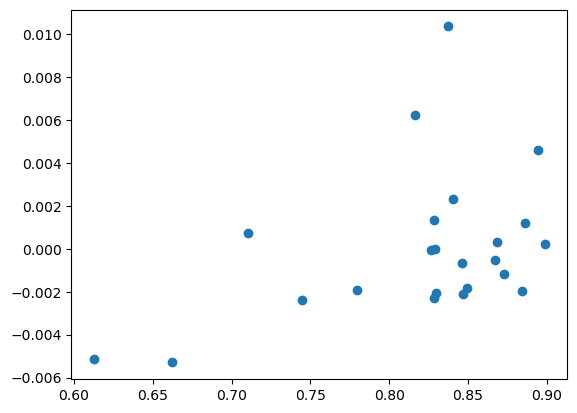

In [2]:
#graph inners of cluster
#REMARK KMEAN with dec oder initi, and random init performs much worse.
Cluster_num=99
cluster_map = pd.DataFrame()
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

CL=ClusterIndicesNumpy(Cluster_num, kmeans.labels_)
CL_center=kmeans.cluster_centers_[Cluster_num]
complex_center=H.cat2complex(CL_center)
complex_cluster=H.cat2complex(X[CL])
inners=complex_cluster.conj()@complex_center
print(np.mean(abs(inners)))
inners_cat=np.stack((inners.real, inners.imag), axis=-1)
plt.scatter(inners_cat[:,0], inners_cat[:,1])
print(inners.shape)

#STATS:

medium_hat=H.cat2complex(kmeans.cluster_centers_)
sum_max_inner_original=0      
torch_inners=np.abs(np.inner(medium_hat,medium.T.conj()) ) #entry i j is ghat_i dot bar(g_j) 
        #original way of computing inners
        # mean over true max over hats
index_list=[]
for i in range(400):
    if max(torch_inners[:, i])>.99 and i not in index_list:
        index_list.append(i)
    sum_max_inner_original=sum_max_inner_original+max(torch_inners[:, i])
max_avg_inners_original=sum_max_inner_original/400
print(f'maximum average inner product between centers and truemax_avg_inners_original {max_avg_inners_original}')
num_cluster_list=[len(ClusterIndicesNumpy(Cluster_num, kmeans.labels_)) for Cluster_num in range(400)]
cluster_list=[ClusterIndicesNumpy(Cluster_num, kmeans.labels_) for Cluster_num in range(400)]
centers=kmeans.cluster_centers_

complex_cluster_list=[H.cat2complex(X[CL]) for CL in cluster_list]

complex_center_list=[H.cat2complex(centers[CL]) for CL in range(400)]
inner_list=[(abs(complex_center_list[CL].conj()@complex_cluster_list[CL].T)) for CL in range(400)]
distance_list=[(np.sum((abs(complex_center_list[CL]-complex_cluster_list[CL])**2))**(1/2)) for CL in range(400)]
Avg_cluster_size=np.mean(num_cluster_list)



inners=medium_hat.transpose().conjugate()@medium_hat
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of centers: ', coherence)
print(f'Average Cluster size: {Avg_cluster_size}')
print(f'minimum Cluster size: {min(num_cluster_list)}')
print(f'maximum Cluster size: {max(num_cluster_list)}')
num_ell=sum([len(inner_list[CL]) for CL in range(400)])
print(num_ell)
print(f'avg inner with center: {sum([sum(i) for i in inner_list])/num_ell}')
print(f'max avg inner with center: {max([np.mean(i) for i in inner_list])}')
print(f'min avg inner with center: {min([np.mean(i) for i in inner_list])}')
print(f'avg distance from center: {sum(distance_list)/num_ell}') 



In [8]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=.9).fit(X)

clustering.n_clusters_

In [ ]:
clustering.n_clusters_

1138

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=.5, min_samples=15).fit(X)

len(set(clustering.labels_))

390

In [ ]:
#Raw data visualization of recovered columns
starttime=time.time()
target='raw'
unlabeled_data=10000
batchsize=128
L1_weight=0
THRESH_HOLD_VAL=.01
layers=[256]*10
#[500,500,500,300,300,400,800]#[3000,1000,500,300,300,300,300,300,300,300,300,300,300,300]#[3000,1500,1000,500,500,500,300,300,300,400,400,800]#[1000,1000,1000,500,500,500,300,300,300,400,400,400,800]
GELMA_layers=layers#[500,500,500,300,300,400,800]
CE=False
KM_in=False
INV_weight=0
RESHUFFLE=False
LR=1e-3
GELMA=0
TIME_reverse=False
E_list=0
RESETS=0
GELMA_MAX=.5
GELMA_inc=0
G_0=True
Epochs=3000
index_list=[]
GELMA_MAX=.5
GELMA_inc=0
index_list_list=[]
column_list=[]
data_path=os.path.join(cwd,'Data/PNAS-regime_all_seeds/PNAS-regime_seed0')
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(medium.shape)
inners=medium.transpose().conjugate()@medium
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of data: ', coherence)


Track_run=False
#Enter your wanbd key below and uncomment wanbd code to track run on wandb
if Track_run:
    key='89a70fbc572a495206df640bd6c9cbf2a4a0dcaa' #enter your own key here
    wandb.login(key=key) 
    wandb.init(project='Test runs')
    wandb.config['unlabeled_data']=unlabeled_data 
    wandb.config['L1_weight']=L1_weight
    wandb.config['layers']=layers
    wandb.config['GELMA']=GELMA
wand_dict={}
#GELMA_layers.append(500)
#layers.append(500)
training_data=H.data_rho_loaded(data_path+'/train',unlabeled_data/80000, normalize=True)
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
sigmoid = nn.Sigmoid()
softmax=nn.Softmax(dim=0)
#training_data.b=training_data.b.to(device)
#training_data.rho=training_data.rho.to(device)
#rh_t, _=torch.split(rho, 400, dim=-1)


val_data=H.data_rho_loaded(data_path+'/val', 3000/80000, normalize=True)
b_val=val_data.b.to(device)
rho_val=val_data.rho.to(device)
rh_v, _=torch.split(rho_val, 400, dim=-1)
indim=int(training_data.b[0].shape[0]/2)
outdim=int(training_data.rho[0].shape[0]/4)
enc_dim=training_data.b[0].shape[0]/2
if KM_in:
    enc_dim=enc_dim+outdim*2
decoder_hats=[]
for EXP_NUM in range(50):
    encoder=M.fc_net_extra(enc_dim, layers,outdim, net_type='fc',linear_type='real', activation='leaky', bias=True, out_scaling=None,dropout=.5)
    #decoder=nn.Linear(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]), bias=False)  #R^ {N_k} -> C^{N_rec*N_freq}
    decoder=M.norm_linear(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]))  #R^ {N_k} -> C^{N_rec*N_freq}
    #decoder=M.fc_net_extra(outdim, layers[::-1], indim, net_type='fc',linear_type='real', activation='relu', bias=True, out_scaling=None,dropout=.5)
    if G_0:
        G_0_w=(np.array(mat73.loadmat(data_path+'/G_0.mat')['A0']))
        G_0_w=torch.cat((torch.tensor(G_0_w.real), torch.tensor(G_0_w.imag)), dim=0)
        G_0_w=G_0_w.float()
        decoder.weight.data=nn.parameter.Parameter(G_0_w.clone().detach().requires_grad_(True))
        Complex_eye=torch.eye(int(outdim*2)).unsqueeze(1)
        medium_hat=decoder(Complex_eye).squeeze()
        medium_hat=F.normalize(medium_hat, dim=-1)
        #print(f'G_0 initialization successful: {torch.allclose(medium_hat, G_0_w.T)}')


 #   print(H.count_parameters(encoder))
#    print('Data shapes:', training_data.b[0].shape[0]/2, training_data.rho[0].shape[0]/4)
    encoder.to(device)
    decoder.to(device)
    relu=nn.ReLU()
    leaky_relu=nn.LeakyReLU(THRESH_HOLD_VAL)
    optimizer = torch.optim.AdamW(encoder.parameters(), lr=LR)
    optimizer_decod = torch.optim.AdamW(decoder.parameters(), lr=LR)


    tanh=nn.Tanh()
    softmax=nn.Softmax(dim=1)
    bce_loss_fn=nn.BCELoss() 
    Threshold=nn.Threshold(THRESH_HOLD_VAL, 0)  
    L2_loss_fn=nn.MSELoss()
    CE_loss_fn=nn.CrossEntropyLoss()
    L2_loss_fn=lambda x,y: torch.sqrt(nn.MSELoss()(x,y))
    L1_loss_fn=nn.L1Loss()
    Complex_eye=torch.eye(int(outdim*2)).unsqueeze(1).to(device)
    softmax=nn.Softmax(dim=1)
    if GELMA>0:
        GELMA_net=M.fc_net_batch(training_data.b[0].shape[0]/2, GELMA_layers, training_data.b[0].shape[0]/2, net_type='fc',linear_type='real', activation='leaky', bias=True, out_scaling=None, dropout=.5)
        optimizer_GELMA = torch.optim.AdamW(GELMA_net.parameters(), lr=LR, maximize=True)
        GELMA_net.to(device)
      #  GELMA_net=nn.DataParallel(GELMA_net)
        GELMA_net.train()
    def f_col(batch):
        b=torch.stack([item[0] for item in batch])
        rho=torch.stack([item[1] for item in batch])
        num_targets=torch.stack([item[2] for item in batch])
        return b.to(device), rho.to(device), num_targets


    def rescale_rho(z):
        minimum, _=torch.min(z, -1, keepdim=True)
        maxium, _=torch.max(z, -1,   keepdim=True)
        z=(z-minimum)/(maxium-minimum)
        return z
    lr_scheduler_enc=torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=.995, last_epoch=-1)
    lr_scheduler_decod=torch.optim.lr_scheduler.ExponentialLR(optimizer_decod, gamma=.995, last_epoch=-1)
    trainloader=DataLoader(training_data,batch_size=batchsize,shuffle=True,num_workers=0)
    if E_list>0:
        encs=[M.fc_net_extra(enc_dim, layers,outdim, net_type='fc',linear_type='real', activation='relu', bias=True, out_scaling=None,dropout=.5) for i in range(E_list)]
        opts=[torch.optim.AdamW(enc.parameters(), lr=LR) for enc in encs]
        for enc in encs:
            enc.to(device)
    for epoch in range(Epochs):
        if RESETS>0 and epoch%RESETS==0:
            decoder=M.norm_linear(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]))  #R^ {N_k} -> C^{N_rec*N_freq}
            if G_0:
                G_0=(np.array(mat73.loadmat(data_path+'/G_0.mat')['A0']))
                G_0_w=torch.cat((torch.tensor(G_0.real), torch.tensor(G_0.imag)), dim=0)
                G_0_w=G_0_w.float()
                decoder.weight.data=nn.parameter.Parameter(G_0_w.clone().detach().requires_grad_(True))
                decoder.to(device)
                medium_hat=decoder(Complex_eye).squeeze()
                medium_hat=F.normalize(medium_hat, dim=-1)
            optimizer = torch.optim.AdamW(encoder.parameters(), lr=LR)
            optimizer_decod = torch.optim.AdamW(decoder.parameters(), lr=LR)
        train_lossavg=0
        train_lossavg=0
        L1_loss_avg=0
        coupled_grad=0
        project_grad=0

        inner_loss_term_avg=0
        for batch, (b, rho, num_targets) in enumerate(trainloader):
            if True:
                b=b.to(device)
                rho=rho.to(device)
                optimizer.zero_grad()
                optimizer_decod.zero_grad()
                if E_list>0:
                    for enc in encs:
                        enc.zero_grad()
                if KM_in:
                    medium_hat=decoder(Complex_eye).squeeze()
                    medium_hat=F.normalize(medium_hat, dim=-1)
                    Mhat_real, Mhat_imag=torch.split(medium_hat, int(medium_hat.shape[1]/2), dim=-1)
                    Mhat_imag=-Mhat_imag
                    b_real, b_imag=torch.split(b.squeeze(), int(b.shape[-1]/2), dim=-1)
                    km_b_real=Mhat_real.squeeze()@b_real.squeeze().T-Mhat_imag.squeeze()@b_imag.squeeze().T
                    km_b_imag=Mhat_real.squeeze()@b_imag.squeeze().T+Mhat_imag.squeeze()@b_real.squeeze().T

                    km_b=torch.cat((km_b_real.T, km_b_imag.T), dim=-1)
                    In_put=torch.cat((b, km_b), dim=-1)

                    rho_hat=encoder(In_put)
                elif TIME_reverse:
                    rho_hat=encoder(decoder.time_reverse(b.squeeze()))
                else:
                    rho_hat=encoder(b)

                if E_list>0:
                    rho_hats=[enc(b) for enc in encs]
                    rho_hats=[relu(rho_hat) for rho_hat in rho_hats]
                    for rho_hat_l in rho_hats:
                        max_rho_l, _=torch.max(rho_hat_l, dim=-1, keepdim=True)
                        rho_hat_l=rho_hat_l/max_rho_l

                    b_hats=[decoder(rho_hat_l) for rho_hat_l in rho_hats]
                    L2_loss=sum([L2_loss_fn(b_hat_l.squeeze(), b.squeeze()) for b_hat_l in b_hats])/len(b_hats)
                    L2_loss.backward()
                    for opt in opts:
                        opt.step()
                #rho_hat=sigmoid(rho_hat)
                #rho_hat=softmax(rho_hat)
                #rho_hat=relu(rho_hat)
                rho_hat=leaky_relu(rho_hat)
                max_rho, _=torch.max(abs(rho_hat), dim=-1, keepdim=True)
                rho_hat=abs(rho_hat)/max_rho
                #rho_hat=rescale_rho(rho_hat)
                #rho_hat=Threshold(abs(rho_hat))
                #max_rho, _=torch.max(rho_hat, dim=-1, keepdim=True)
                #rho_hat=rho_hat/max_rho
                #rho_hat=tanh(rho_hat)

                

                b_hat=decoder(rho_hat)
                if INV_weight>0:
                    medium_hat=decoder(Complex_eye).squeeze()
                    medium_hat=F.normalize(medium_hat, dim=-1)
                    b_real, b_imag=torch.split(b.squeeze(), int(b.shape[-1]/2), dim=-1)
                    Mhat_real, Mhat_imag=torch.split(medium_hat, int(medium_hat.shape[1]/2), dim=-1)
                    complex_mat=Mhat_real+1j*Mhat_imag
                    #print(f'og complex mat shape: {complex_mat.shape}')
                    complex_mat=complex_mat.T #yes
                    complex_mat=torch.linalg.pinv(complex_mat.T.conj()@complex_mat, hermitian=True)@complex_mat.T.conj()  
                    complex_b=b_real+1j*b_imag
                    complex_b=complex_b.T
                    #print(complex_mat.shape, complex_b.shape)

                    rho_inv=complex_mat@complex_b
                    rho_inv=rho_inv.T
                    rho_inv_real=rho_inv.real
                    rho_inv_imag=rho_inv.imag
                    INV_loss=L2_loss_fn(rho_inv_real, rho_hat)*INV_weight
                    INV_loss.backward(retain_graph=True)
                    INV_loss=INV_loss.item()/INV_weight
                    


                    
                    
                    




                if L1_weight>0:
                    L1_loss=L1_weight*L1_loss_fn(rho_hat, rho_hat*0)
                    L1_loss.backward(retain_graph=True)  
                    L1_loss_avg+=L1_loss.item()/L1_weight/len(trainloader)
                else:
                    L1_loss=-1

                if CE>0:
                    rho_hat_hat=encoder(b_hat)

                    CEloss=CE_loss_fn(rho_hat_hat, rho_hat)*CE
                    CEloss.backward(retain_graph=True)
                    CEloss=CEloss.item()/CE

                
                
                L2_loss=L2_loss_fn(b_hat.squeeze(), b.squeeze())
                L2_loss.backward(retain_graph=True)





                
                optimizer.step()
                optimizer_decod.step()
                train_lossavg+=L2_loss.item()/len(trainloader)


                if GELMA>0 and epoch>0:
                    optimizer_GELMA.zero_grad()
                    optimizer.zero_grad()
                    optimizer_decod.zero_grad()
                    
                    GELMA_out=GELMA_net(b).squeeze()
                    GELMA_out=F.normalize(GELMA_out, dim=-1).squeeze()
                    b_hat=b_hat.squeeze()

                    GELMA_inners_coupled=(torch.inner((-b_hat).squeeze(),GELMA_out.squeeze()).diagonal(dim1=-2, dim2=-1))
                    GELMA_inners_coupled=sum(GELMA_inners_coupled)/(torch.numel(GELMA_inners_coupled))
                    GELMA_inners_project=(torch.inner((b).squeeze(),GELMA_out.squeeze()).diagonal(dim1=-2, dim2=-1))
                    GELMA_inners_project=sum(GELMA_inners_project)/(torch.numel(GELMA_inners_project))
                    GELMA_inners=(GELMA_inners_project+GELMA_inners_coupled)
                    GELMA_inners.backward(retain_graph=True)
                    
                    
                    optimizer_GELMA.step()
                    optimizer_GELMA.zero_grad()



                    inner_loss_term_avg+=(GELMA_inners).item()/len(trainloader)
                    optimizer.zero_grad()
                    optimizer_decod.zero_grad()
                    GELMA_inners_coupled=(torch.inner((-b_hat).squeeze(),GELMA_out.squeeze()).diagonal(dim1=-2, dim2=-1))
                    GELMA_inners_coupled=GELMA*sum(GELMA_inners_coupled)/(torch.numel(GELMA_inners_coupled))
                    GELMA_inners_coupled.backward()
                    optimizer.step()
                    optimizer_decod.step()

                
                
                else:
                    inner_loss_term_avg=-1

        #if L1_loss>5e-5:
        #    L1_weight=L1_weight*(0.9)
        val_lossavg=0
        #if epoch%50==0:
        #    H.plot_2_imgs(rho, rho_hat,ind=5, figsize=5, scaling=None, xpix=20, ypix=20, font_size=25)
        encoder.eval()
        decoder.eval()
        if GELMA_inc>0 and GELMA<GELMA_MAX:
            GELMA=GELMA*GELMA_inc
            if GELMA>GELMA_MAX:
                GELMA=GELMA_MAX
                print('GELMA max reached')

        if INV_weight>0 and INV_weight<1e-1:
            INV_weight=INV_weight*(1.03)


        optimizer.zero_grad()
        optimizer_decod.zero_grad()

        font_size = 50
        if KM_in:
            medium_hat=decoder(Complex_eye).squeeze()
            medium_hat=F.normalize(medium_hat, dim=-1)
            Mhat_real, Mhat_imag=torch.split(medium_hat, int(medium_hat.shape[1]/2), dim=-1)
            Mhat_imag=-Mhat_imag
            b_real, b_imag=torch.split(b_val.squeeze(), int(b_val.shape[-1]/2), dim=-1)
            km_b_real=Mhat_real.squeeze()@b_real.squeeze().T-Mhat_imag.squeeze()@b_imag.squeeze().T
            km_b_imag=Mhat_real.squeeze()@b_imag.squeeze().T+Mhat_imag.squeeze()@b_real.squeeze().T

            km_b=torch.cat((km_b_real.T, km_b_imag.T), dim=-1)
            
        # print(b.shape, km_b.shape,km_b_real.shape, Mhat_real.shape)
            In_put=torch.cat((b_val, km_b), dim=-1)

            rho_hat=encoder(In_put)
        else:
            rho_hat=encoder(b_val)
        #rho_hat=sigmoid(rho_hat)
        #rho_hat=relu(rho_hat)
        rho_hat=leaky_relu(rho_hat)
        max_rho, _=torch.max(abs(rho_hat), dim=-1, keepdim=True)
        rho_hat=abs(rho_hat)/max_rho
        #rho_hat=softmax(rho_hat)
        #rho_hat=rescale_rho(rho_hat)
        #rho_hat=Threshold(abs(rho_hat))
        #max_rho, _=torch.max(rho_hat, dim=-1, keepdim=True)
        #rho_hat=rho_hat/max_rho
        #rho_hat=tanh(rho_hat)

        b_hat=decoder(rho_hat) 
        L2_loss=L2_loss_fn(b_hat.squeeze(), b_val.squeeze())
        val_lossavg+=L2_loss.item()





    
    
    
        #if epoch%50==0:
        #    H.plot_2_imgs(rho_val, rho_hat,ind=5, figsize=5, scaling=None, xpix=20, ypix=20, font_size=25)
        
        if epoch==Epochs-1:
            sum_max_inner_original=0
            medium_hat=decoder(Complex_eye).squeeze()
            medium_hat=F.normalize(medium_hat, dim=-1)
            medium_hat=medium_hat.cpu().detach().numpy()
            medium_hat=H.cat2complex(medium_hat)                    
            torch_inners=np.abs(np.inner(medium_hat,medium.T.conj()) ) #entry i j is ghat_i dot bar(g_j) 
                    #original way of computing inners
                    # mean over true max over hats
            index_list=[]
            for i in range(int(outdim*2)):
                if max(torch_inners[:, i])>.99 and i not in index_list:
                    index_list.append(i)
                sum_max_inner_original=sum_max_inner_original+max(torch_inners[:, i])
            max_avg_inners_original=sum_max_inner_original/(int(outdim*2))
    
            
            #lr_scheduler_enc.step()
            #lr_scheduler_decod.step()
            
            
            print(f'EXP_NUM: {epoch}, train loss: {train_lossavg}, L1 loss: {L1_loss_avg}, val loss: {val_lossavg}, max avg inners: {max_avg_inners_original}, GELMA loss: {inner_loss_term_avg}, num indices: {len(index_list)}')
            #print(f'coupled grad: {coupled_grad}, project grad: {project_grad}')
            wand_dict['train loss']=train_lossavg
            wand_dict['val loss']=val_lossavg
            if L1_loss>0:
                wand_dict['L1 loss']=L1_loss
            if GELMA>0:
                wand_dict['GELMA loss']=inner_loss_term_avg

        
            wand_dict['max avg inners']=max_avg_inners_original
        if Track_run:
            wandb.log(wand_dict)

    #index_list_list.append(index_list)
    #print(time.time()-starttime)
    if Track_run:
        wandb.finish()
    index_list_list.append(index_list)
    medium_hat=decoder(Complex_eye).squeeze()
    medium_hat=F.normalize(medium_hat, dim=-1)
    medium_hat=medium_hat.cpu().detach().numpy()
    medium_hat=H.cat2complex(medium_hat)                    
    column_list.append(medium_hat)


np.save(f'/home/achristie/Codes_data/Experiment_data/50_trained_decoders_10kdata.npy', column_list)




(1450, 400)
(400, 400)
coherence of data:  0.7119395644427655
Medium: (1450, 400), Rho: (10000, 400), B: (10000, 1450)
Medium: (1450, 400), Rho: (3000, 400), B: (3000, 1450)
EXP_NUM: 2999, train loss: 0.0015432490802169598, L1 loss: 0, val loss: 0.011204905807971954, max avg inners: 0.8959561941455711, GELMA loss: -1, num indices: 186
EXP_NUM: 2999, train loss: 0.0016121257220312385, L1 loss: 0, val loss: 0.011023945175111294, max avg inners: 0.883176158984269, GELMA loss: -1, num indices: 149
EXP_NUM: 2999, train loss: 0.001618202192166561, L1 loss: 0, val loss: 0.011525366455316544, max avg inners: 0.9019377293214201, GELMA loss: -1, num indices: 183
EXP_NUM: 2999, train loss: 0.0014778077175039092, L1 loss: 0, val loss: 0.010881862603127956, max avg inners: 0.8943628467490174, GELMA loss: -1, num indices: 168
EXP_NUM: 2999, train loss: 0.0015296786404627415, L1 loss: 0, val loss: 0.01102527417242527, max avg inners: 0.8831796962546957, GELMA loss: -1, num indices: 156
EXP_NUM: 2999,

In [ ]:
#Col_list_1=np.load(f'/home/achristie/Codes_data/Experiment_data/50_trained_decoders_5kdata.npy')
#np.save(f'/home/achristie/Codes_data/Experiment_data/6_trained_decoders_5kdata.npy',column_list)
#full_list=np.concatenate((Col_list_1, np.array(column_list)))
#full_list.shape
#np.save(f'/home/achristie/Codes_data/Experiment_data/50_trained_decoders_5kdata.npy',full_list)
#full_list_2=np.load(f'/home/achristie/Codes_data/Experiment_data/50_trained_decoders_5kdata.npy')
#full_list_2.shape


(50, 400, 1450)

(50, 400, 1450)


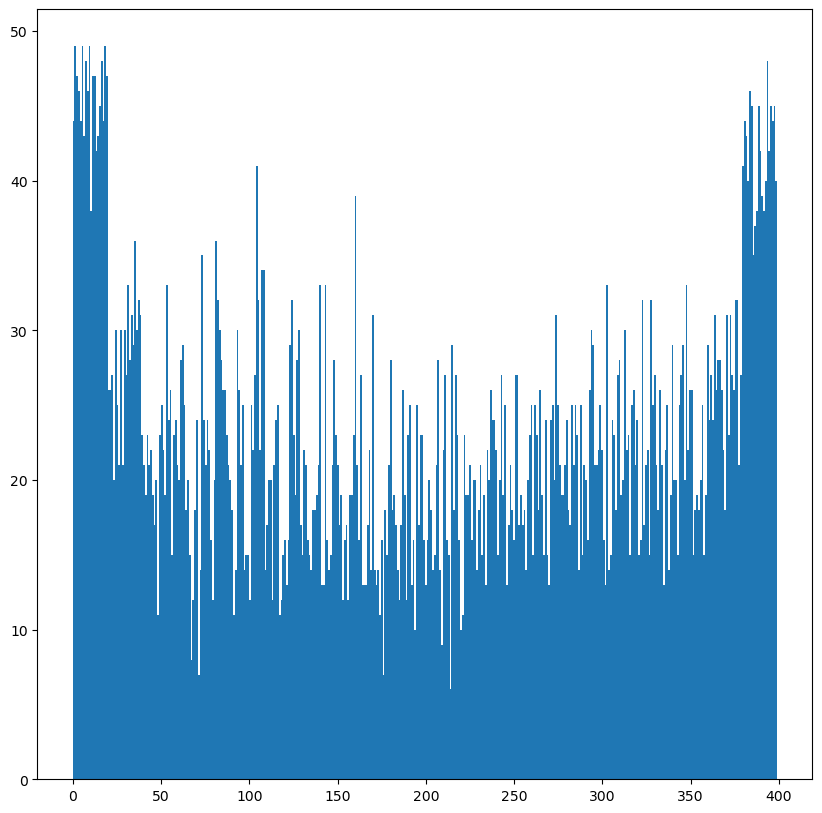

(6, 49, 23.41)

In [6]:

columns=np.load(f'/home/achristie/Codes_data/Experiment_data/50_trained_decoders_5kdata.npy')
columns=np.load(f'/home/achristie/Codes_data/Experiment_data/50_trained_decoders_10kdata.npy')
T_hold=.96

medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(columns.shape)
index_list_list=[]
for medium_hat in columns:
    sum_max_inner_original=0      
    torch_inners=np.abs(np.inner(medium_hat,medium.T.conj()) ) #entry i j is ghat_i dot bar(g_j) 
            #original way of computing inners
            # mean over true max over hats
    index_list=[]
    for i in range(400):
        if max(torch_inners[:, i])>=T_hold and i not in index_list:
            index_list.append(i)
        sum_max_inner_original=sum_max_inner_original+max(torch_inners[:, i])
    max_avg_inners_original=sum_max_inner_original/400
    #print(f' max avg inners: {max_avg_inners_original}')
    index_list_list.append(index_list)
#


    

index_list_filled=[]
index_hist=[]
for j in index_list_list:
    filled=[]
    for i in range(400):
        if i in j:
            filled.append(1)
            index_hist.append(i)
        else:
            filled.append(0)
    index_list_filled.append(filled)
fig, axes=plt.subplots(nrows= 1, ncols= 1,figsize=(10,10))

ax=axes
#col=ax.pcolor(index_list_filled)

#col = ax.pcolor(index_list_filled)
#cbar=plt.colorbar(col, ax=ax)
counts, bins = np.histogram(index_hist, bins=400)
plt.hist(index_hist, bins=400)
#plt.stairs(counts, bins)
#plt.hlines(np.mean(counts), xmin=0, xmax=400, color='r')
plt.show()
np.min(counts), np.max(counts), np.mean(counts)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


(1450, 400)
(400, 400)
coherence of data:  0.7119395644427655


wandb: Currently logged in as: acc5843. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/achristie/.netrc


Medium: (1450, 400), Rho: (5000, 400), B: (5000, 1450)
Medium: (1450, 400), Rho: (3000, 400), B: (3000, 1450)
42381200
G_0 initialization successful: True
42381200
Data shapes: 1450.0 200.0
epoch: 0, train loss: 0.0245573238003999, L1 loss: 0.4413965631101746, val loss: 0.024094831198453903, max avg inners: 0.25990844145704645, GELMA loss: -1, num indices: 0
epoch: 1, train loss: 0.01792190214619041, L1 loss: 0.18269213196617784, val loss: 0.012911214493215084, max avg inners: 0.40012751829960946, GELMA loss: 0.0008138221266563051, num indices: 0
epoch: 2, train loss: 0.008501960965804758, L1 loss: 0.1552624897158239, val loss: 0.007550218608230352, max avg inners: 0.4228949299313362, GELMA loss: -0.00022975375177338716, num indices: 0
epoch: 3, train loss: 0.00532323644729331, L1 loss: 0.16472933639306575, val loss: 0.005723394453525543, max avg inners: 0.42774429553929977, GELMA loss: -0.0006606287584872919, num indices: 0
epoch: 4, train loss: 0.004176102823112158, L1 loss: 0.164538

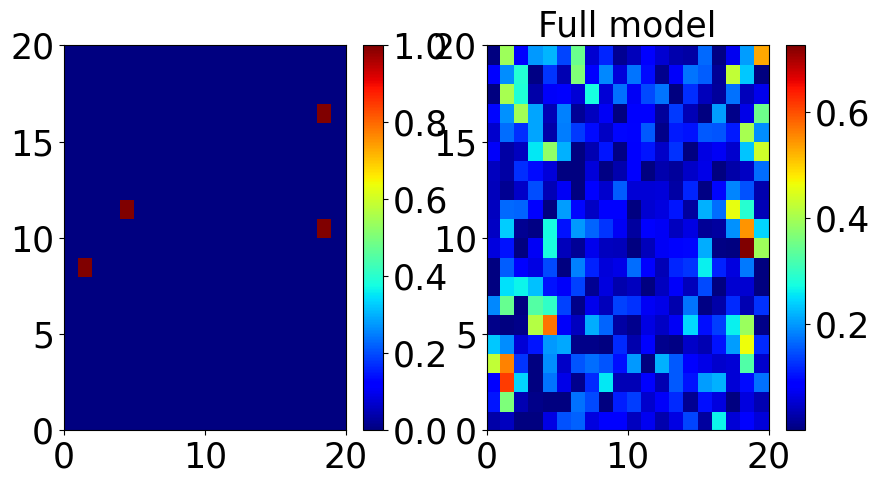

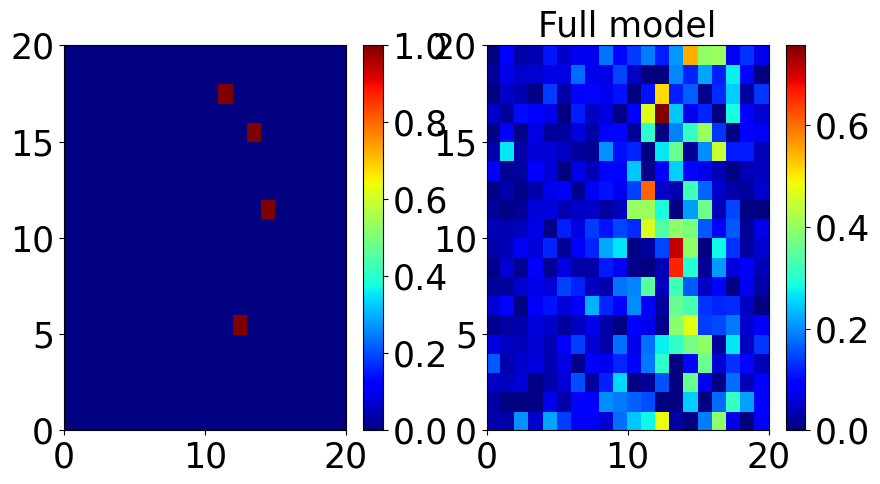

epoch: 49, train loss: 0.0014431721385335548, L1 loss: 0.11403241296648048, val loss: 0.0019206684082746506, max avg inners: 0.46112608985373926, GELMA loss: -0.0001061027178366203, num indices: 0
epoch: 50, train loss: 0.0014415543060749773, L1 loss: 0.11360278240317712, val loss: 0.0021193544380366802, max avg inners: 0.4615809854894616, GELMA loss: -9.34477870032424e-05, num indices: 0
epoch: 51, train loss: 0.0014212903741281477, L1 loss: 0.11302666353003588, val loss: 0.0020777357276529074, max avg inners: 0.46210506365406934, GELMA loss: -0.00011177547348779629, num indices: 0
epoch: 52, train loss: 0.0014288085396401591, L1 loss: 0.11247158090554876, val loss: 0.0019748578779399395, max avg inners: 0.46252578747037354, GELMA loss: -9.576486481819302e-05, num indices: 0
epoch: 53, train loss: 0.0014112963777733966, L1 loss: 0.11178384120285045, val loss: 0.002062565879896283, max avg inners: 0.46299300353018447, GELMA loss: -0.0001212263949128101, num indices: 0
epoch: 54, train 

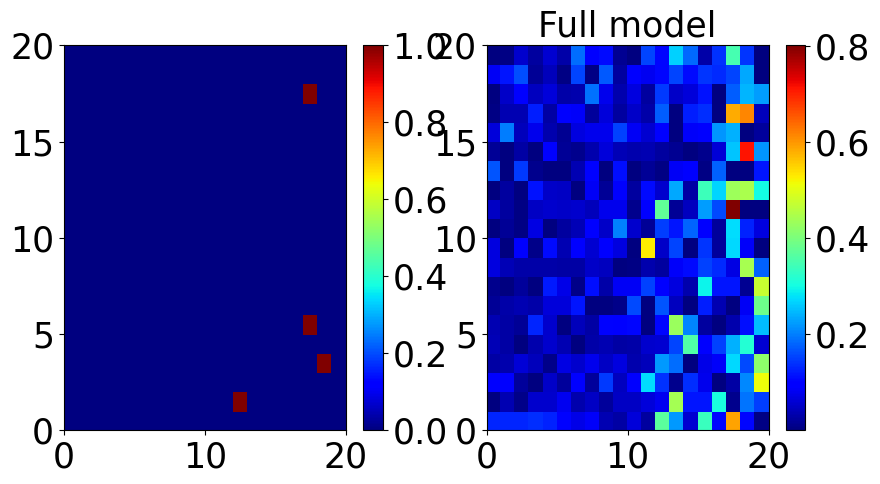

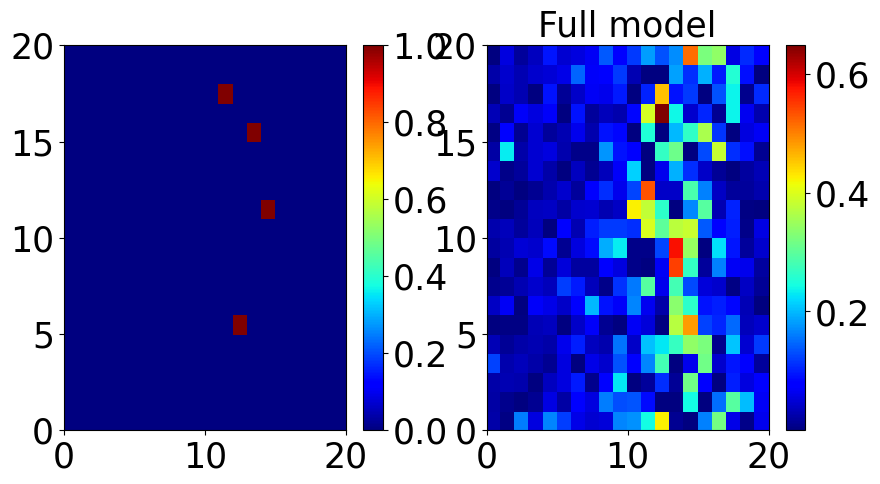

epoch: 99, train loss: 0.0011481590277981014, L1 loss: 0.09387936170242028, val loss: 0.0016757227713242173, max avg inners: 0.48058388843608424, GELMA loss: -6.120828475104646e-05, num indices: 0
epoch: 100, train loss: 0.0011537940241396428, L1 loss: 0.09388380603922997, val loss: 0.0018459698185324669, max avg inners: 0.48084789575027204, GELMA loss: -6.883949590701376e-05, num indices: 0
epoch: 101, train loss: 0.0011698711139615627, L1 loss: 0.09354217727377545, val loss: 0.0018139240564778447, max avg inners: 0.48125617957700306, GELMA loss: -8.689067981322296e-05, num indices: 0
epoch: 102, train loss: 0.001137143123196438, L1 loss: 0.09326521667389898, val loss: 0.0017582407454028726, max avg inners: 0.481479013998343, GELMA loss: -6.246733755688183e-05, num indices: 0
epoch: 103, train loss: 0.0011370923166396096, L1 loss: 0.09290824109484674, val loss: 0.0017385073006153107, max avg inners: 0.4818463587912364, GELMA loss: -8.367793270735999e-05, num indices: 0
epoch: 104, tra

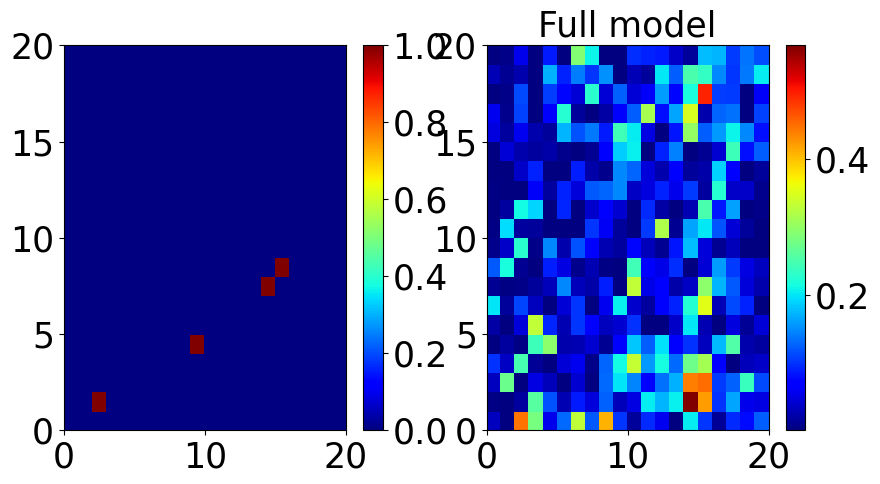

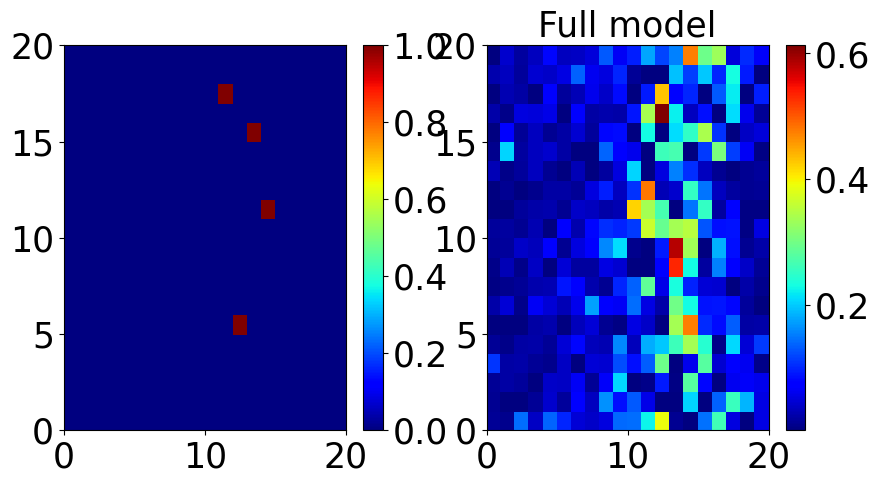

epoch: 149, train loss: 0.000997435094905086, L1 loss: 0.08215539764933055, val loss: 0.001508131274022162, max avg inners: 0.49436221712779854, GELMA loss: -5.5141343182185665e-05, num indices: 0
epoch: 150, train loss: 0.000991554296342656, L1 loss: 0.08188329811673611, val loss: 0.0014605902833864093, max avg inners: 0.4946113797686679, GELMA loss: -7.543096653535029e-05, num indices: 0
epoch: 151, train loss: 0.0009693208194221372, L1 loss: 0.08170364926627371, val loss: 0.0015141295734792948, max avg inners: 0.4947902598681372, GELMA loss: -1.075255731848302e-05, num indices: 0
epoch: 152, train loss: 0.000992511626100168, L1 loss: 0.0814720358903287, val loss: 0.001565217156894505, max avg inners: 0.49503858081278446, GELMA loss: -5.781750551250297e-05, num indices: 0
epoch: 153, train loss: 0.0009679494964075275, L1 loss: 0.0813427130196942, val loss: 0.0016040984774008393, max avg inners: 0.49525011105987976, GELMA loss: -6.261211565288251e-05, num indices: 0
epoch: 154, train 

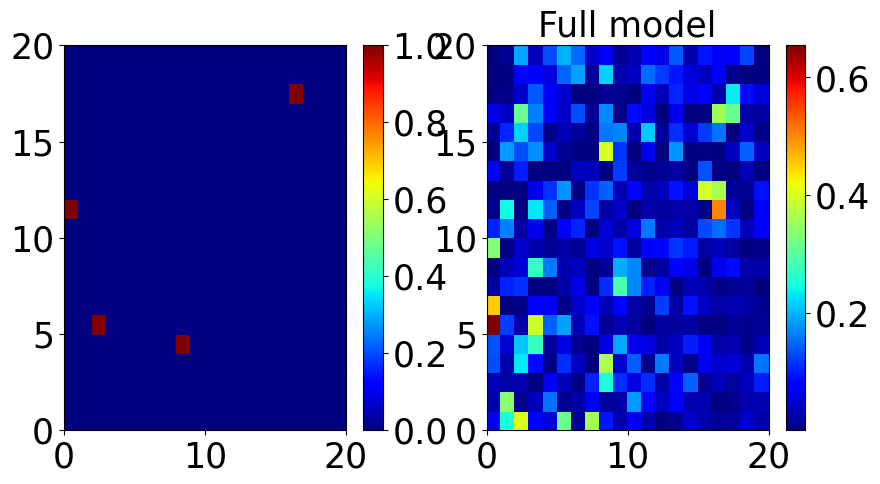

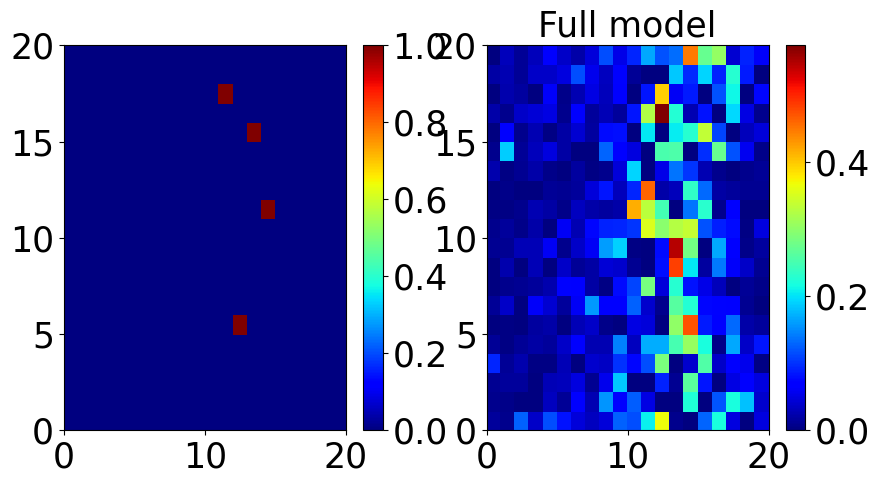

epoch: 199, train loss: 0.0008923895118641668, L1 loss: 0.07371870906354161, val loss: 0.0013636804651468992, max avg inners: 0.5041877794204893, GELMA loss: -4.534061736194417e-05, num indices: 0
epoch: 200, train loss: 0.0008696161661646326, L1 loss: 0.0735665722459089, val loss: 0.0014276031870394945, max avg inners: 0.5043549495083872, GELMA loss: -5.150959477759897e-05, num indices: 0
epoch: 201, train loss: 0.0008847953533404506, L1 loss: 0.07351939912041416, val loss: 0.0014104944420978427, max avg inners: 0.5045653190170202, GELMA loss: -2.7610877441475165e-05, num indices: 0
epoch: 202, train loss: 0.0008874156672391107, L1 loss: 0.0732971057004761, val loss: 0.0013771760277450085, max avg inners: 0.5047051878973347, GELMA loss: -4.443442230694927e-05, num indices: 0
epoch: 203, train loss: 0.0008716570606338793, L1 loss: 0.07325165806832956, val loss: 0.00145947455894202, max avg inners: 0.5048683873323417, GELMA loss: -6.846504838904366e-05, num indices: 0
epoch: 204, train 

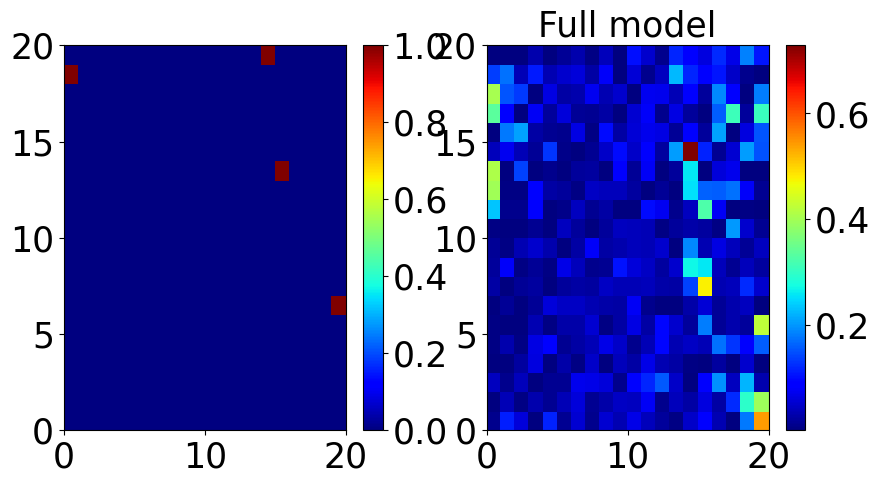

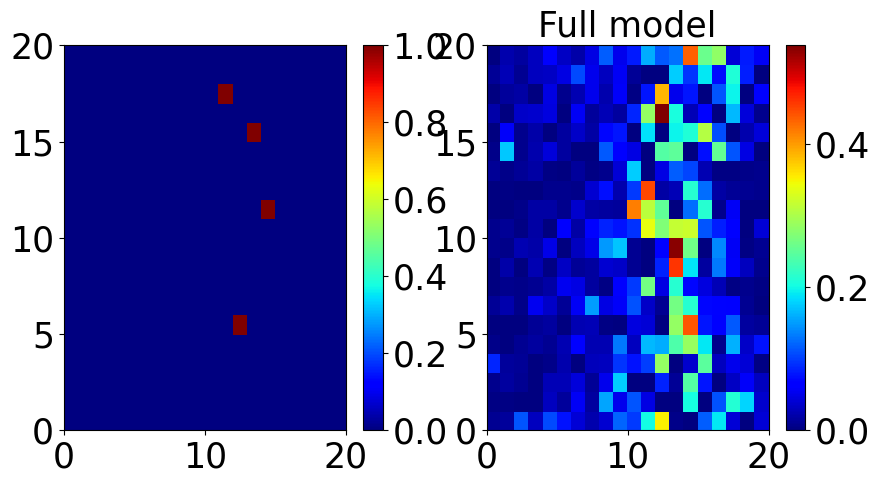

epoch: 249, train loss: 0.0008040338943828831, L1 loss: 0.0675501954901847, val loss: 0.0014411398442462087, max avg inners: 0.5120666767472991, GELMA loss: -5.298361793393269e-05, num indices: 0
epoch: 250, train loss: 0.0008121272112475708, L1 loss: 0.06750419743184466, val loss: 0.0014215882401913404, max avg inners: 0.5122180954617264, GELMA loss: -3.497461293591187e-05, num indices: 0
epoch: 251, train loss: 0.0007964017320773564, L1 loss: 0.06740893422829686, val loss: 0.0013673502253368497, max avg inners: 0.5124009355236835, GELMA loss: -6.937237922102212e-05, num indices: 0
epoch: 252, train loss: 0.000796918192645535, L1 loss: 0.0672928474159562, val loss: 0.0013410376850515604, max avg inners: 0.5124772413329738, GELMA loss: -7.91392507380806e-05, num indices: 0
epoch: 253, train loss: 0.0008024834052775989, L1 loss: 0.06714947830914753, val loss: 0.0014050636673346162, max avg inners: 0.5125782957793896, GELMA loss: -8.42575835122261e-05, num indices: 0
epoch: 254, train lo

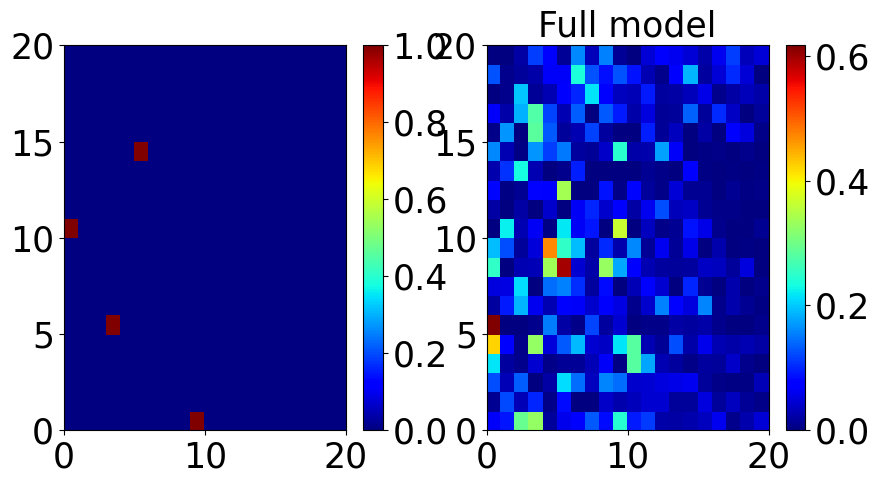

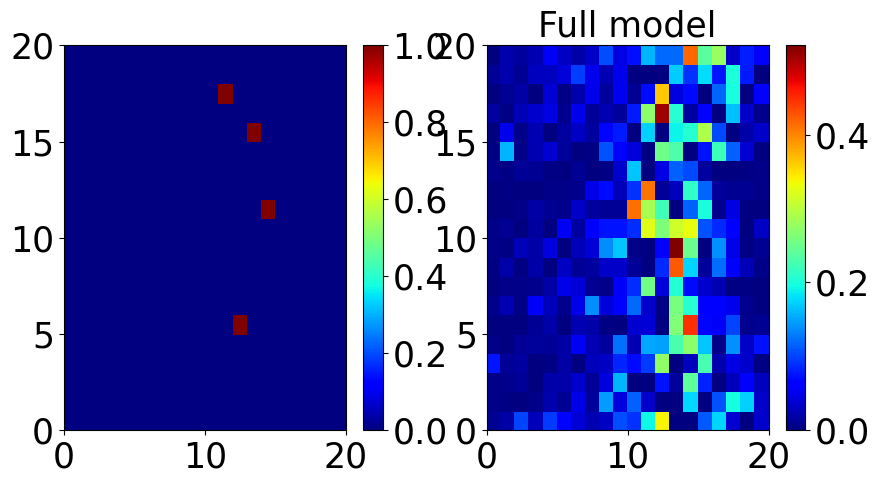

epoch: 299, train loss: 0.0007503903980250473, L1 loss: 0.06284716000664048, val loss: 0.0014027295401319861, max avg inners: 0.5182756003358329, GELMA loss: -7.88034827564843e-05, num indices: 0
epoch: 300, train loss: 0.0007738774103927424, L1 loss: 0.06279211247601779, val loss: 0.0013042220380157232, max avg inners: 0.5184189704888701, GELMA loss: -4.551346646621825e-05, num indices: 0
epoch: 301, train loss: 0.0007501323416363447, L1 loss: 0.06275239538808819, val loss: 0.0013334538089111447, max avg inners: 0.51847965078402, GELMA loss: -2.756464018602856e-05, num indices: 0
epoch: 302, train loss: 0.0007556652170023882, L1 loss: 0.06269480454648146, val loss: 0.001361558330245316, max avg inners: 0.51868173296246, GELMA loss: -2.6311292822356318e-05, num indices: 0
epoch: 303, train loss: 0.0007591941364808009, L1 loss: 0.06258260837057605, val loss: 0.001334668486379087, max avg inners: 0.5187318845927189, GELMA loss: -2.8479319735197353e-05, num indices: 0
epoch: 304, train lo

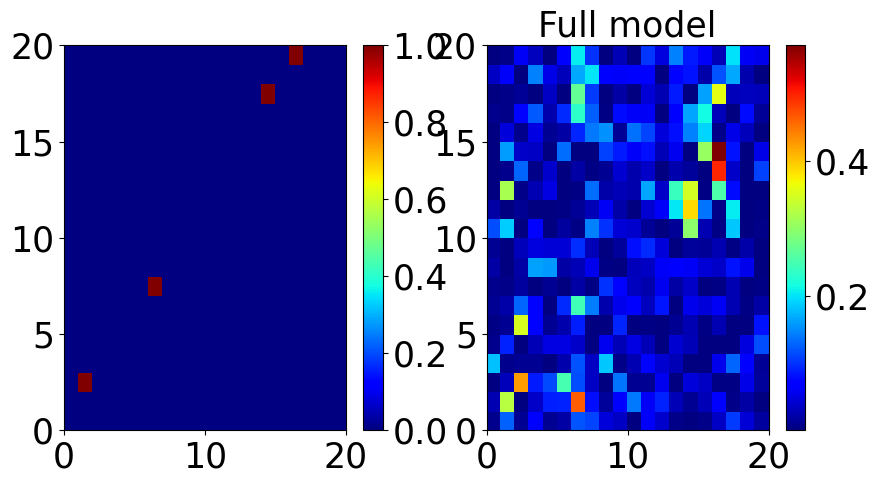

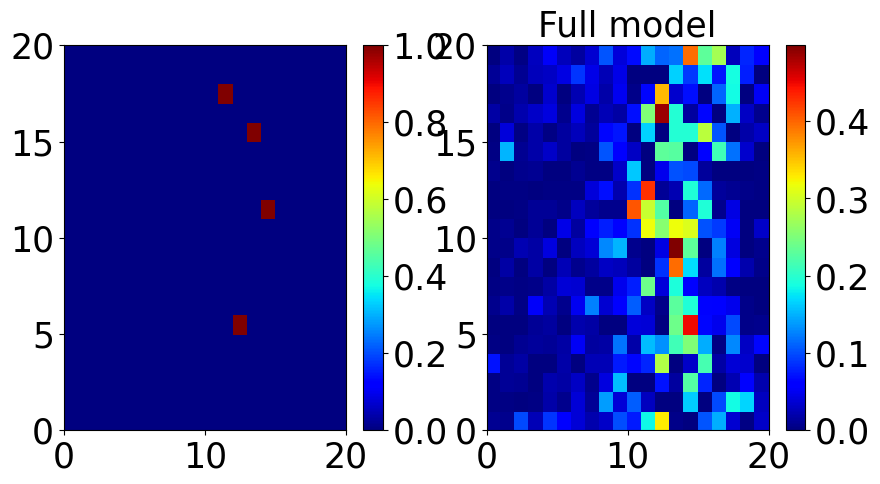

epoch: 349, train loss: 0.0007094836371834388, L1 loss: 0.05914841021876782, val loss: 0.0012935148552060127, max avg inners: 0.523328688421782, GELMA loss: -6.055648591427597e-05, num indices: 0
epoch: 350, train loss: 0.0007020087607088499, L1 loss: 0.059061162392026745, val loss: 0.0013985892292112112, max avg inners: 0.5233681640803147, GELMA loss: -3.05273468256928e-05, num indices: 0
epoch: 351, train loss: 0.0007184227870311589, L1 loss: 0.0589979275900987, val loss: 0.0013069823617115617, max avg inners: 0.5234688102774616, GELMA loss: -4.964594409102574e-05, num indices: 0
epoch: 352, train loss: 0.0007017786017968321, L1 loss: 0.05888000268896576, val loss: 0.0012522571487352252, max avg inners: 0.5236604179718666, GELMA loss: -6.158476317068561e-05, num indices: 0
epoch: 353, train loss: 0.0006921348787727767, L1 loss: 0.05896674983887351, val loss: 0.001320439507253468, max avg inners: 0.5236469875442886, GELMA loss: -2.856980281649157e-05, num indices: 0
epoch: 354, train 

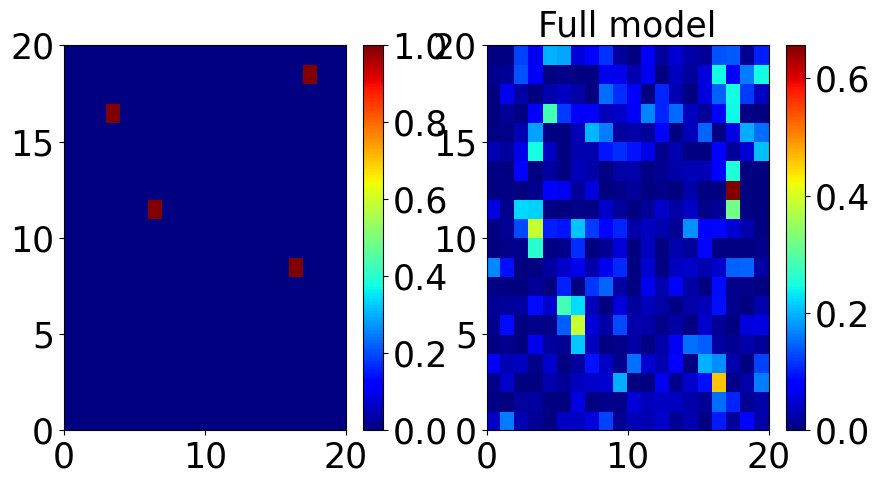

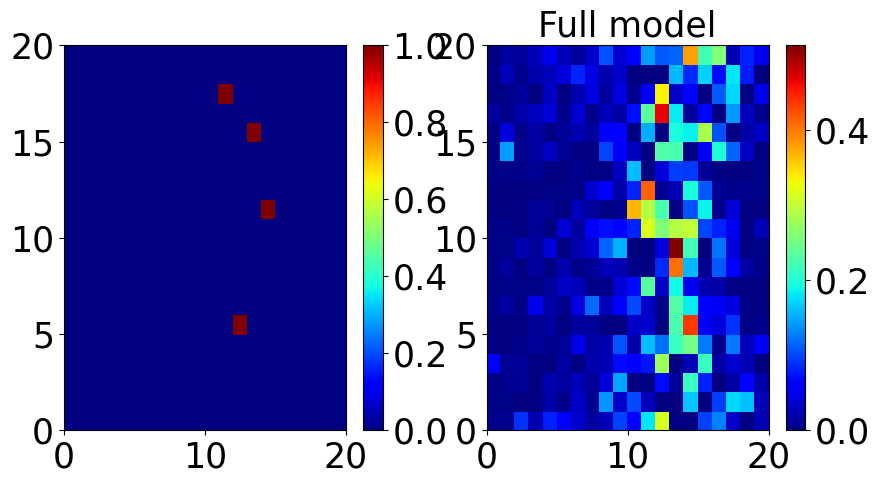

epoch: 399, train loss: 0.0006624885485507548, L1 loss: 0.05621109403364244, val loss: 0.0013493943260982633, max avg inners: 0.5277840069798337, GELMA loss: -4.071652256243396e-05, num indices: 0
epoch: 400, train loss: 0.0006658373851678335, L1 loss: 0.05608603214568575, val loss: 0.0012599470792338252, max avg inners: 0.5278732497428105, GELMA loss: -1.3731779472436759e-05, num indices: 0
epoch: 401, train loss: 0.0006604181835427878, L1 loss: 0.056097371816576924, val loss: 0.0013406345387920737, max avg inners: 0.5279680594898979, GELMA loss: -4.131263413000852e-05, num indices: 0
epoch: 402, train loss: 0.0006758116433047693, L1 loss: 0.0560244795451581, val loss: 0.001316005364060402, max avg inners: 0.5280439677087778, GELMA loss: -1.982541143661364e-05, num indices: 0
epoch: 403, train loss: 0.0006715741867083126, L1 loss: 0.055980107936193235, val loss: 0.0013060030760243535, max avg inners: 0.5280922079842325, GELMA loss: -2.537746549933218e-05, num indices: 0
epoch: 404, tr

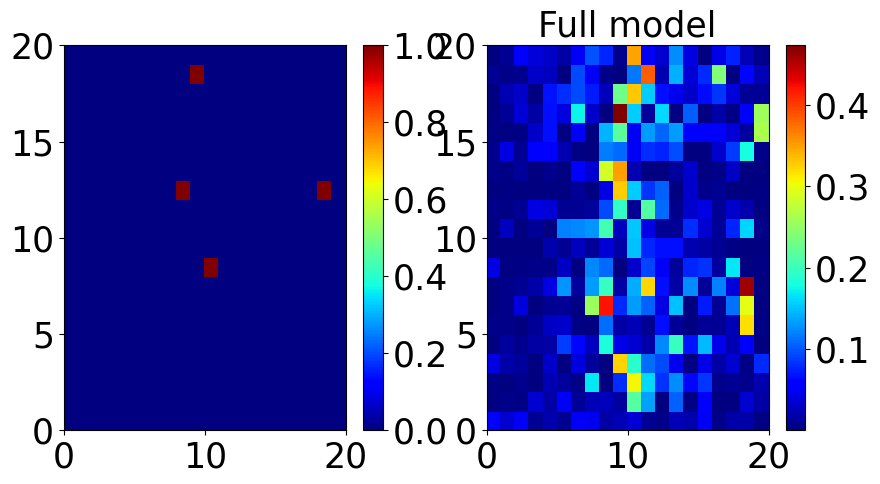

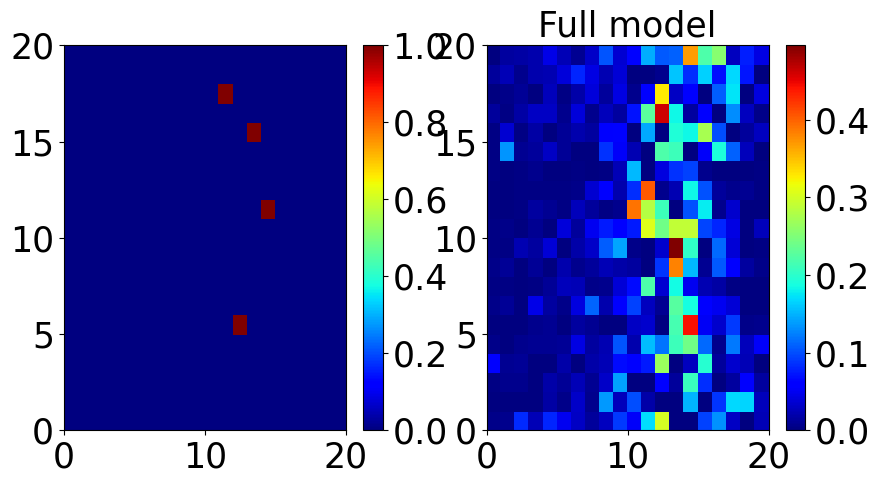

epoch: 449, train loss: 0.0006434542025090197, L1 loss: 0.05364608114177827, val loss: 0.0012975814752280712, max avg inners: 0.5314064679129051, GELMA loss: -2.7581912581808863e-05, num indices: 0
epoch: 450, train loss: 0.0006426452455343681, L1 loss: 0.053601382842316525, val loss: 0.0012640247587114573, max avg inners: 0.5314889896974347, GELMA loss: -5.163125024409965e-06, num indices: 0
epoch: 451, train loss: 0.0006284376868279652, L1 loss: 0.05354749946491211, val loss: 0.0012159658363088965, max avg inners: 0.5314965812026581, GELMA loss: -3.428749041631817e-05, num indices: 0
epoch: 452, train loss: 0.0006323166948277503, L1 loss: 0.053452087195182685, val loss: 0.0012494889087975025, max avg inners: 0.53156764292481, GELMA loss: 1.0651546472217889e-05, num indices: 0
epoch: 453, train loss: 0.0006297854852164166, L1 loss: 0.05345057807062403, val loss: 0.001253010705113411, max avg inners: 0.5316989561437305, GELMA loss: -5.885435821255669e-05, num indices: 0
epoch: 454, tra

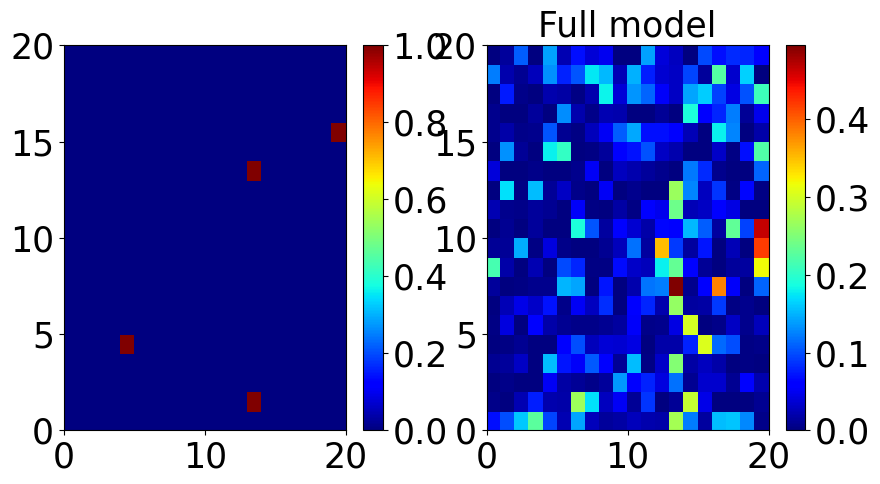

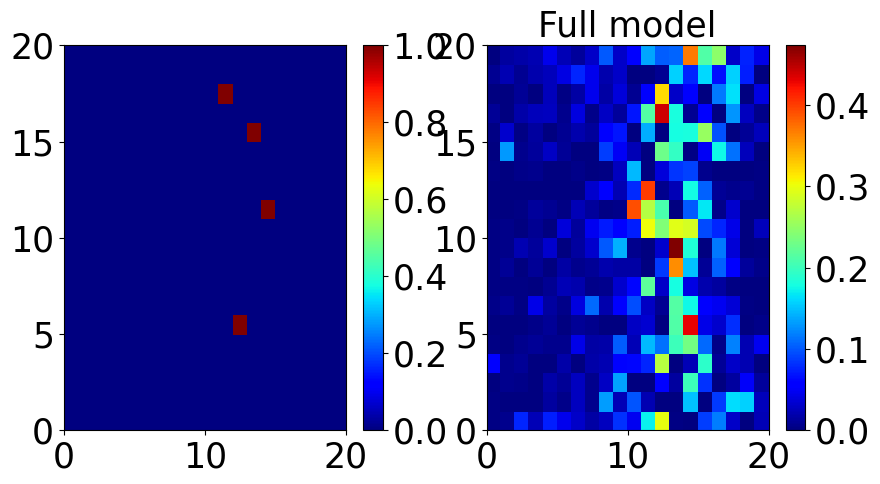

epoch: 499, train loss: 0.0006162572753964923, L1 loss: 0.05153766587682185, val loss: 0.001277390168979764, max avg inners: 0.5347799533692568, GELMA loss: -4.590615426423027e-05, num indices: 0
epoch: 500, train loss: 0.0006061166684958153, L1 loss: 0.051522008288884535, val loss: 0.001309571205638349, max avg inners: 0.5348214440167441, GELMA loss: -1.7981919154408384e-05, num indices: 0
epoch: 501, train loss: 0.0006270760000916197, L1 loss: 0.05142416321177734, val loss: 0.0012929558288305998, max avg inners: 0.5348552665239771, GELMA loss: -3.4824774775188414e-05, num indices: 0
epoch: 502, train loss: 0.0006226867597433738, L1 loss: 0.05141910642123548, val loss: 0.001242001773789525, max avg inners: 0.5349141366887151, GELMA loss: -2.540224377298726e-05, num indices: 0
epoch: 503, train loss: 0.00061270226869965, L1 loss: 0.051308522324688965, val loss: 0.0012665737885981798, max avg inners: 0.5349819271140634, GELMA loss: -3.4925795625895274e-05, num indices: 0
epoch: 504, tra

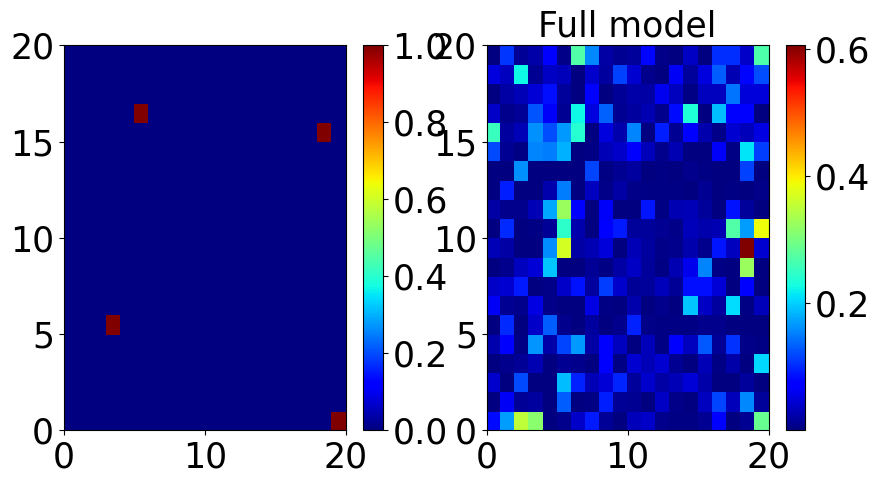

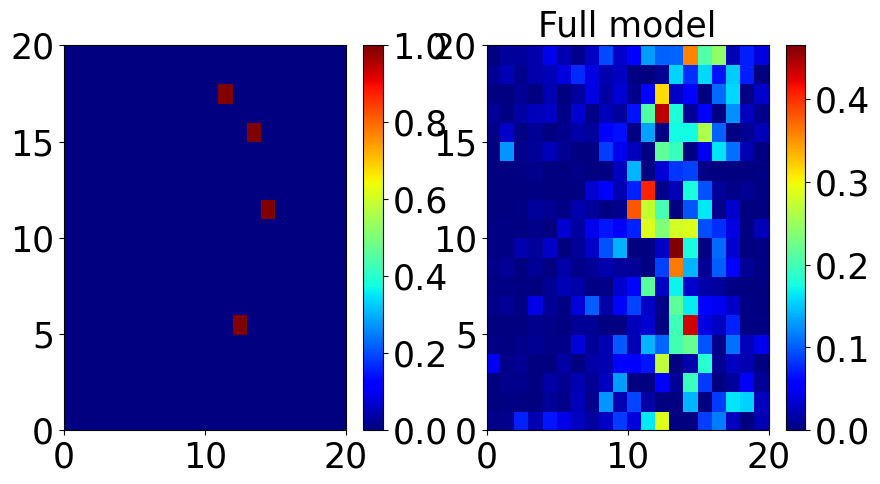

epoch: 549, train loss: 0.0005870801891433074, L1 loss: 0.04970945074092015, val loss: 0.001283944584429264, max avg inners: 0.5376140626063917, GELMA loss: -2.9884433024562886e-05, num indices: 0
epoch: 550, train loss: 0.0005847271808306686, L1 loss: 0.049690592368278885, val loss: 0.0012335769133642316, max avg inners: 0.5376418399221985, GELMA loss: -1.2855785735155228e-05, num indices: 0
epoch: 551, train loss: 0.000579936013673432, L1 loss: 0.04968082357663661, val loss: 0.0012994951102882624, max avg inners: 0.5376656427730001, GELMA loss: -4.33891682405374e-05, num indices: 0
epoch: 552, train loss: 0.0005857582116732374, L1 loss: 0.04959822645105305, val loss: 0.0012907939963042736, max avg inners: 0.5377578437025115, GELMA loss: -3.8766628131270414e-05, num indices: 0
epoch: 553, train loss: 0.0005856251620571128, L1 loss: 0.04956491247867234, val loss: 0.0012412882642820477, max avg inners: 0.5378100390369497, GELMA loss: -3.214777061657515e-05, num indices: 0
epoch: 554, tr

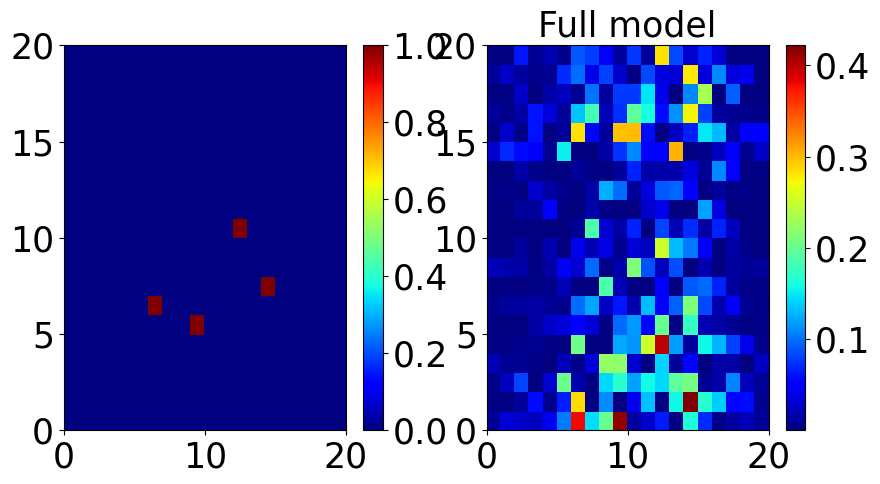

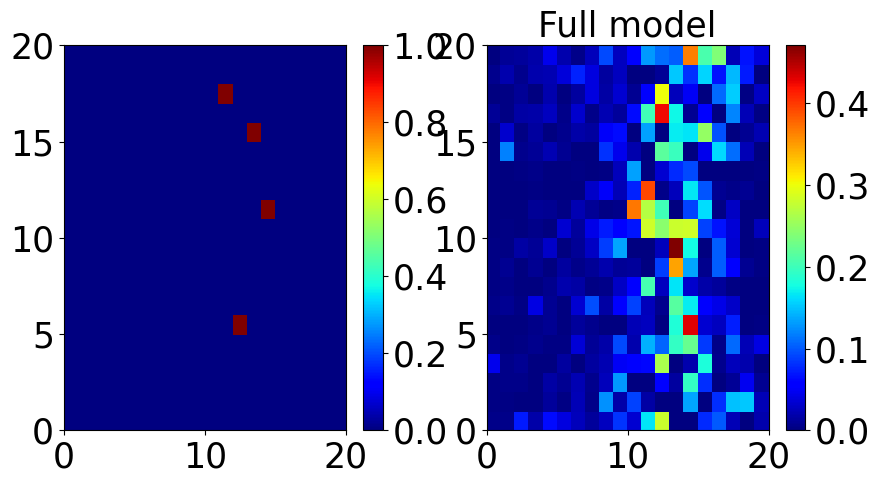

epoch: 599, train loss: 0.0005740961307310501, L1 loss: 0.04807226559933042, val loss: 0.0012726931599900126, max avg inners: 0.540198527035326, GELMA loss: -3.1175459298538044e-05, num indices: 0
epoch: 600, train loss: 0.0005686833086656407, L1 loss: 0.04803582369277137, val loss: 0.0012410819763317704, max avg inners: 0.5402947370414339, GELMA loss: -1.302045093325433e-05, num indices: 0
epoch: 601, train loss: 0.0005671421939041467, L1 loss: 0.04797130668521277, val loss: 0.0012427933979779482, max avg inners: 0.5403707821845305, GELMA loss: -3.445476322667672e-05, num indices: 0
epoch: 602, train loss: 0.0005735446902690455, L1 loss: 0.047962482040020404, val loss: 0.0012868507765233517, max avg inners: 0.5403161714697968, GELMA loss: -4.762431926792488e-05, num indices: 0
epoch: 603, train loss: 0.0005692849154002033, L1 loss: 0.04796019238710869, val loss: 0.0012468048371374607, max avg inners: 0.5403633953214494, GELMA loss: -1.5691161206632386e-05, num indices: 0
epoch: 604, t

In [12]:
#Raw data unlabeled 
starttime=time.time()
target='raw'
unlabeled_data=5000
batchsize=128
L1_weight=1e-3
THRESH_HOLD_VAL=.01
layers=[64]*3
#[500,500,500,300,300,400,800]#[3000,1000,500,300,300,300,300,300,300,300,300,300,300,300]#[3000,1500,1000,500,500,500,300,300,300,400,400,800]#[1000,1000,1000,500,500,500,300,300,300,400,400,400,800]
GELMA_layers=layers#[500,500,500,300,300,400,800]
CE=False
KM_in=False
INV_weight=0
RESHUFFLE=False
LR=1e-3
GELMA=5e-3
TIME_reverse=False
E_list=0
RESETS=0
GELMA_MAX=.5
GELMA_inc=0
G_0=True
Epochs=300000
index_list=[]
GELMA_MAX=.5
GELMA_inc=0
G_0=True
index_list=[]
GELMA_MAX=.5
GELMA_inc=0
data_path=os.path.join(cwd,'Data/PNAS-regime_all_seeds/PNAS-regime_seed0')
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
print(medium.shape)
inners=medium.transpose().conjugate()@medium
print(inners.shape)
coherence=0
for i in inners:
    for j in i:
        if abs(j)>coherence and j<.99:
            coherence=abs(j)
print('coherence of data: ', coherence)


Track_run=True
#Enter your wanbd key below and uncomment wanbd code to track run on wandb
if Track_run:
    key='89a70fbc572a495206df640bd6c9cbf2a4a0dcaa' #enter your own key here
    wandb.login(key=key) 
    wandb.init(project='rtt unlabeled', name="Unlabeled data: 5000, 1dconv with GELMA")
    wandb.config['unlabeled_data']=unlabeled_data 
    wandb.config['L1_weight']=L1_weight
    wandb.config['layers']=layers
    wandb.config['GELMA']=GELMA
    wandb.config['G_0']=G_0
    wandb.config['GELMA_layers']=GELMA_layers   
    wandb.config['inv_weight']=INV_weight
    wandb.config['CE']=CE
wand_dict={}
#GELMA_layers.append(500)
#layers.append(500)
training_data=H.data_rho_loaded(data_path+'/train',unlabeled_data/80000, normalize=True)
medium= np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt'])
sigmoid = nn.Sigmoid()
softmax=nn.Softmax(dim=0)
#training_data.b=training_data.b.to(device)
#training_data.rho=training_data.rho.to(device)
#rh_t, _=torch.split(rho, 400, dim=-1)


val_data=H.data_rho_loaded(data_path+'/val', 3000/80000, normalize=True)
b_val=val_data.b.to(device)
rho_val=val_data.rho.to(device)
rh_v, _=torch.split(rho_val, 400, dim=-1)
indim=int(training_data.b[0].shape[0]/2)
outdim=int(training_data.rho[0].shape[0]/4)
enc_dim=training_data.b[0].shape[0]/2
if KM_in:
    enc_dim=enc_dim+outdim*2
decoder_hats=[]
#encoder=M.fc_net_extra(enc_dim, layers,outdim, net_type='fc',linear_type='real', activation='leaky', bias=True, out_scaling=None,dropout=.5)
encoder=M.channeled_lin_layers(enc_dim, layers, outdim*2, dropout=.5)
print(H.count_parameters(encoder))
#decoder=nn.Linear(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]), bias=False)  #R^ {N_k} -> C^{N_rec*N_freq}
decoder=M.norm_linear(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]))  #R^ {N_k} -> C^{N_rec*N_freq}
#decoder=M.fc_net_extra(outdim, layers[::-1], indim, net_type='fc',linear_type='real', activation='relu', bias=True, out_scaling=None,dropout=.5)
if G_0:
    G_0_w=(np.array(mat73.loadmat(data_path+'/G_0.mat')['A0']))
    #G_0_w=(np.array(mat73.loadmat(data_path+'/rtt.mat')['Artt']))
    
    G_0_w=torch.cat((torch.tensor(G_0_w.real), torch.tensor(G_0_w.imag)), dim=0)
    G_0_w=G_0_w.float()
    decoder.weight.data=nn.parameter.Parameter(G_0_w.clone().detach().requires_grad_(True))
    Complex_eye=torch.eye(int(outdim*2)).unsqueeze(1)
    medium_hat=decoder(Complex_eye).squeeze()
    medium_hat=F.normalize(medium_hat, dim=-1)
    print(f'G_0 initialization successful: {torch.allclose(medium_hat, G_0_w.T)}')


print(H.count_parameters(encoder))
print('Data shapes:', training_data.b[0].shape[0]/2, training_data.rho[0].shape[0]/4)
encoder.to(device)
decoder.to(device)
relu=nn.ReLU()
leaky_relu=nn.LeakyReLU(THRESH_HOLD_VAL)
optimizer = torch.optim.AdamW(encoder.parameters(), lr=LR)
optimizer_decod = torch.optim.AdamW(decoder.parameters(), lr=LR)


tanh=nn.Tanh()
softmax=nn.Softmax(dim=1)
bce_loss_fn=nn.BCELoss() 
Threshold=nn.Threshold(THRESH_HOLD_VAL, 0)  
L2_loss_fn=nn.MSELoss()
CE_loss_fn=nn.CrossEntropyLoss()
L2_loss_fn=lambda x,y: torch.sqrt(nn.MSELoss()(x,y))
L1_loss_fn=nn.L1Loss()
Complex_eye=torch.eye(int(outdim*2)).unsqueeze(1).to(device)
softmax=nn.Softmax(dim=1)
if GELMA>0:
    GELMA_net=M.fc_net_batch(training_data.b[0].shape[0]/2, GELMA_layers, training_data.b[0].shape[0]/2, net_type='fc',linear_type='complex', activation='leaky', bias=True, out_scaling=None, dropout=.5)
    optimizer_GELMA = torch.optim.AdamW(GELMA_net.parameters(), lr=LR, maximize=True)
    GELMA_net.to(device)
    GELMA_net.train()
def f_col(batch):
    b=torch.stack([item[0] for item in batch])
    rho=torch.stack([item[1] for item in batch])
    num_targets=torch.stack([item[2] for item in batch])
    return b.to(device), rho.to(device), num_targets


def rescale_rho(z):
    minimum, _=torch.min(z, -1, keepdim=True)
    maxium, _=torch.max(z, -1,   keepdim=True)
    z=(z-minimum)/(maxium-minimum)
    return z
lr_scheduler_enc=torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=.995, last_epoch=-1)
lr_scheduler_decod=torch.optim.lr_scheduler.ExponentialLR(optimizer_decod, gamma=.995, last_epoch=-1)
trainloader=DataLoader(training_data,batch_size=batchsize,shuffle=True,num_workers=0)
if E_list>0:
    encs=[M.fc_net_extra(enc_dim, layers,outdim, net_type='fc',linear_type='real', activation='relu', bias=True, out_scaling=None,dropout=.5) for i in range(E_list)]
    opts=[torch.optim.AdamW(enc.parameters(), lr=LR) for enc in encs]
    for enc in encs:
        enc.to(device)
for epoch in range(Epochs):
    if RESETS>0 and epoch%RESETS==0:
        #decoder=M.norm_linear(int(training_data.rho[0].shape[0]/2), int(training_data.b[0].shape[0]))  #R^ {N_k} -> C^{N_rec*N_freq}
        #if G_0:
        #    G_0=(np.array(mat73.loadmat(data_path+'/G_0.mat')['A0']))
        #    G_0_w=torch.cat((torch.tensor(G_0.real), torch.tensor(G_0.imag)), dim=0)
        #    G_0_w=G_0_w.float()
        #    decoder.weight.data=nn.parameter.Parameter(G_0_w.clone().detach().requires_grad_(True))
        #    decoder.to(device)
        #    medium_hat=decoder(Complex_eye).squeeze()
        #    medium_hat=F.normalize(medium_hat, dim=-1)
        #encoder=M.fc_net_extra(enc_dim, layers,outdim, net_type='fc',linear_type='complex', activation='mod_relu', bias=True, out_scaling=None,dropout=.5)
        encoder=M.channeled_lin_layers(enc_dim, layers, outdim*2, dropout=.5)
        encoder.to(device)
        optimizer = torch.optim.AdamW(encoder.parameters(), lr=LR)
        optimizer_decod = torch.optim.AdamW(decoder.parameters(), lr=LR)
    train_lossavg=0
    train_lossavg=0
    L1_loss_avg=0
    coupled_grad=0
    project_grad=0
    INV_loss_avg=0
    CEloss_avg=0


    inner_loss_term_avg=0
    for batch, (b, rho, num_targets) in enumerate(trainloader):
        if True:
            b=b.to(device)
            rho=rho.to(device)
            optimizer.zero_grad()
            optimizer_decod.zero_grad()
            if E_list>0:
                for enc in encs:
                    enc.zero_grad()
            if KM_in:
                medium_hat=decoder(Complex_eye).squeeze()
                medium_hat=F.normalize(medium_hat, dim=-1)
                Mhat_real, Mhat_imag=torch.split(medium_hat, int(medium_hat.shape[1]/2), dim=-1)
                Mhat_imag=-Mhat_imag
                b_real, b_imag=torch.split(b.squeeze(), int(b.shape[-1]/2), dim=-1)
                km_b_real=Mhat_real.squeeze()@b_real.squeeze().T-Mhat_imag.squeeze()@b_imag.squeeze().T
                km_b_imag=Mhat_real.squeeze()@b_imag.squeeze().T+Mhat_imag.squeeze()@b_real.squeeze().T

                km_b=torch.cat((km_b_real.T, km_b_imag.T), dim=-1)
                In_put=torch.cat((b, km_b), dim=-1)

                rho_hat=encoder(In_put)
            elif TIME_reverse:
                rho_hat=encoder(decoder.time_reverse(b.squeeze()))
            else:
                rho_hat=encoder(b)

            if E_list>0:
                rho_hats=[enc(b) for enc in encs]
                rho_hats=[relu(rho_hat) for rho_hat in rho_hats]
                for rho_hat_l in rho_hats:
                    max_rho_l, _=torch.max(rho_hat_l, dim=-1, keepdim=True)
                    rho_hat_l=rho_hat_l/max_rho_l

                b_hats=[decoder(rho_hat_l) for rho_hat_l in rho_hats]
                L2_loss=sum([L2_loss_fn(b_hat_l.squeeze(), b.squeeze()) for b_hat_l in b_hats])/len(b_hats)
                L2_loss.backward()
                for opt in opts:
                    opt.step()
            rho_hat=sigmoid(rho_hat)
            #rho_hat=softmax(rho_hat)
            #rho_hat=relu(rho_hat)
            #rho_hat=leaky_relu(rho_hat)
            #max_rho, _=torch.max(abs(rho_hat), dim=-1, keepdim=True)
            #rho_hat=abs(rho_hat)/max_rho

            #topk, indices=torch.topk(rho_hat, 4, dim=-1)
            #rho_hat = torch.zeros_like(rho_hat).scatter(1, indices, topk)
#            res.scatter(1, indices, topk)

            #rho_hat=rescale_rho(rho_hat)
            #rho_hat=Threshold(abs(rho_hat))
            #max_rho, _=torch.max(rho_hat, dim=-1, keepdim=True)
            #rho_hat=rho_hat/max_rho
            #rho_hat=tanh(rho_hat)

            

            b_hat=decoder(rho_hat)
            if INV_weight>0:
                medium_hat=decoder(Complex_eye).squeeze()
                medium_hat=F.normalize(medium_hat, dim=-1)
                b_real, b_imag=torch.split(b.squeeze(), int(b.squeeze().shape[-1]/2), dim=-1)
                Mhat_real, Mhat_imag=torch.split(medium_hat, int(medium_hat.shape[1]/2), dim=-1)
                complex_mat=Mhat_real+1j*Mhat_imag
                #print(f'og complex mat shape: {complex_mat.shape}')
                #complex_mat=complex_mat.T #yes
                complex_mat=torch.linalg.pinv(complex_mat.T.conj()@complex_mat, hermitian=True)@complex_mat.T.conj()  
                #complex_mat=complex_mat.T.conj()  
                complex_b=b_real+1j*b_imag
                #complex_b=complex_b.T
                #print(complex_mat.shape, complex_b.shape)

                rho_inv=complex_b@complex_mat
                #rho_inv=rho_inv.T
                rho_inv_real=rho_inv.real
                rho_inv_imag=rho_inv.imag
                rho_hat_inv=(rho_inv_real**2+rho_inv_imag**2)**(1/2)
                #INV_loss=L2_loss_fn(rho_hat_inv, rho_hat)*INV_weight
                INV_loss=L1_loss_fn(rho_hat_inv, rho_hat_inv*0)*INV_weight
                INV_loss.backward(retain_graph=True)
                INV_loss_avg+=INV_loss.item()/INV_weight/len(trainloader)
                


                
                
                




            if L1_weight>0:
                L1_loss=L1_weight*L1_loss_fn(rho_hat, rho_hat*0)
                L1_loss.backward(retain_graph=True)  
                L1_loss_avg+=L1_loss.item()/L1_weight/len(trainloader)
            else:
                L1_loss=-1

            if CE>0:
                rho_hat_hat=encoder(b_hat)

                CEloss=CE_loss_fn(rho_hat_hat, rho_hat)*CE
                CEloss.backward(retain_graph=True)
                CEloss_avg+=CEloss.item()/CE/len(trainloader)


            
            
            L2_loss=L2_loss_fn(b_hat.squeeze(), b.squeeze())
            L2_loss.backward(retain_graph=True)





            
            optimizer.step()
            optimizer_decod.step()
            train_lossavg+=L2_loss.item()/len(trainloader)


            if GELMA>0 and epoch>0:
                optimizer_GELMA.zero_grad()
                optimizer.zero_grad()
                optimizer_decod.zero_grad()
                
                GELMA_out=GELMA_net(b).squeeze()
                GELMA_out=F.normalize(GELMA_out, dim=-1).squeeze()
                b_hat=b_hat.squeeze()

                


                GELMA_inners_coupled=(torch.inner((-b_hat).squeeze(),GELMA_out.squeeze()).diagonal(dim1=-2, dim2=-1))
                GELMA_inners_coupled=sum(GELMA_inners_coupled)/(torch.numel(GELMA_inners_coupled))
                GELMA_inners_project=(torch.inner((b).squeeze(),GELMA_out.squeeze()).diagonal(dim1=-2, dim2=-1))
                GELMA_inners_project=sum(GELMA_inners_project)/(torch.numel(GELMA_inners_project))
                GELMA_inners=(GELMA_inners_project+GELMA_inners_coupled)
                GELMA_inners.backward(retain_graph=True)
                
                
                optimizer_GELMA.step()
                optimizer_GELMA.zero_grad()
                GELMA_inners=(GELMA_inners_project+GELMA_inners_coupled)
                #GELMA_inners.backward(retain_graph=True)
                
                
                #optimizer_GELMA.step()
                #optimizer_GELMA.zero_grad()



                inner_loss_term_avg+=(GELMA_inners).item()/len(trainloader)
                optimizer.zero_grad()
                optimizer_decod.zero_grad()
                GELMA_inners_coupled=(torch.inner((-b_hat).squeeze(),GELMA_out.squeeze()).diagonal(dim1=-2, dim2=-1))
                GELMA_inners_coupled=GELMA*sum(GELMA_inners_coupled)/(torch.numel(GELMA_inners_coupled))
                GELMA_inners_coupled.backward()
                optimizer.step()
                optimizer_decod.step()

            
            else:
                inner_loss_term_avg=-1

    #if L1_loss>5e-5:
    #    L1_weight=L1_weight*(0.9)
    val_lossavg=0
    if epoch%50==49:
        H.plot_2_imgs(rho, rho_hat,ind=5, figsize=5, scaling=None, xpix=20, ypix=20, font_size=25)
    encoder.eval()
    decoder.eval()
    if GELMA_inc>0 and GELMA<GELMA_MAX:
        GELMA=GELMA*GELMA_inc
        if GELMA>GELMA_MAX:
            GELMA=GELMA_MAX
            print('GELMA max reached')

    if INV_weight>0 and INV_weight<1e-1:
        INV_weight=INV_weight*(1.03)


    optimizer.zero_grad()
    optimizer_decod.zero_grad()

    font_size = 50
    if KM_in:
        medium_hat=decoder(Complex_eye).squeeze()
        medium_hat=F.normalize(medium_hat, dim=-1)
        Mhat_real, Mhat_imag=torch.split(medium_hat, int(medium_hat.shape[1]/2), dim=-1)
        Mhat_imag=-Mhat_imag
        b_real, b_imag=torch.split(b_val.squeeze(), int(b_val.shape[-1]/2), dim=-1)
        km_b_real=Mhat_real.squeeze()@b_real.squeeze().T-Mhat_imag.squeeze()@b_imag.squeeze().T
        km_b_imag=Mhat_real.squeeze()@b_imag.squeeze().T+Mhat_imag.squeeze()@b_real.squeeze().T

        km_b=torch.cat((km_b_real.T, km_b_imag.T), dim=-1)
        
    # print(b.shape, km_b.shape,km_b_real.shape, Mhat_real.shape)
        In_put=torch.cat((b_val, km_b), dim=-1)

        rho_hat=encoder(In_put)
    else:
        rho_hat=encoder(b_val)
    rho_hat=sigmoid(rho_hat)
    #rho_hat=relu(rho_hat)
    #rho_hat=leaky_relu(rho_hat)
    #max_rho, _=torch.max(abs(rho_hat), dim=-1, keepdim=True)
    #rho_hat=abs(rho_hat)/max_rho
    #rho_hat=softmax(rho_hat)
    #rho_hat=rescale_rho(rho_hat)
    #rho_hat=Threshold(abs(rho_hat))
    #max_rho, _=torch.max(rho_hat, dim=-1, keepdim=True)
    #rho_hat=rho_hat/max_rho
    #rho_hat=tanh(rho_hat)

    b_hat=decoder(rho_hat) 
    L2_loss=L2_loss_fn(b_hat.squeeze(), b_val.squeeze())
    val_lossavg+=L2_loss.item()








    if epoch%50==49:
        H.plot_2_imgs(rho_val, rho_hat,ind=5, figsize=5, scaling=None, xpix=20, ypix=20, font_size=25)
    
    if epoch%1==0:
        sum_max_inner_original=0
        medium_hat=decoder(Complex_eye).squeeze()
        medium_hat=F.normalize(medium_hat, dim=-1)
        medium_hat=medium_hat.cpu().detach().numpy()
        medium_hat=H.cat2complex(medium_hat)                    
        torch_inners=np.abs(np.inner(medium_hat,medium.T.conj()) ) #entry i j is ghat_i dot bar(g_j) 
                #original way of computing inners
                # mean over true max over hats
        index_list=[]
        for i in range(int(outdim*2)):
            if max(torch_inners[:, i])>.99 and i not in index_list:
                index_list.append(i)
            sum_max_inner_original=sum_max_inner_original+max(torch_inners[:, i])
        max_avg_inners_original=sum_max_inner_original/(int(outdim*2))

        
        #lr_scheduler_enc.step()
        #lr_scheduler_decod.step()
        
        
        print(f'epoch: {epoch}, train loss: {train_lossavg}, L1 loss: {L1_loss_avg}, val loss: {val_lossavg}, max avg inners: {max_avg_inners_original}, GELMA loss: {inner_loss_term_avg}, num indices: {len(index_list)}')
        #print(f'coupled grad: {coupled_grad}, project grad: {project_grad}')
        wand_dict['train loss']=train_lossavg
        wand_dict['val loss']=val_lossavg
        if L1_loss>0:
            wand_dict['L1 loss']=L1_loss
        if GELMA>0:
            wand_dict['GELMA loss']=inner_loss_term_avg
        if CE>0:
            wand_dict['CE loss']=CEloss_avg
        if INV_weight>0:
            wand_dict['INV loss']=INV_loss_avg

    
        wand_dict['max avg inners']=max_avg_inners_original
        wand_dict['num indices']=len(index_list)
    if Track_run:
        wandb.log(wand_dict)

print(time.time()-starttime)
if Track_run:
    wandb.finish()

